In [14]:
import pandas as pd
import numpy as np
np.random.seed(2)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [15]:
df = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/Data_Redo/Models copy/cleaned_df2.csv')

In [16]:
df

,Unnamed: 0,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,0,5.125,4.210000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,1,5.875,3.540000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,2,3.250,3.580000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,3,4.000,3.440000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,4,6.450,2.498236,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,6707,4.000,4.160000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6707,6708,2.875,2.060000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6708,6709,2.600,2.270000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6709,6710,3.700,2.390000,A3,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,...,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [17]:
cols_drop = ['Unnamed: 0']

In [18]:
df.drop(columns=cols_drop, inplace=True)

In [19]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,...,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,5.125,4.210000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,5.875,3.540000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,...,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,3.250,3.580000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,4.000,3.440000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,6.450,2.498236,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,...,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,4.000,4.160000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6707,2.875,2.060000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6708,2.600,2.270000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,...,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6709,3.700,2.390000,A3,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,197.28,...,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [20]:
df.isna().sum()

Coupon                            0
Yield                             0
Moody's Rating                    0
Weight (%)                        0
Price                             0
Shares                            0
Market Value                      0
Notional Value                    0
Market Cap (intraday) 5           0
Trailing P/E                      0
Forward P/E 1                     0
PEG Ratio (5 yr expected) 1       0
Price/Sales (ttm)                 0
Price/Book (mrq)                  0
Beta (5Y Monthly)                 0
S&P500 52-Week Change 3           0
% Held by Insiders 1              0
% Held by Institutions 1          0
Avg Vol (10 day) 3                0
Avg Vol (3 month) 3               0
Shares Outstanding 5              0
Profit Margin                     0
Operating Margin (ttm)            0
Return on Assets (ttm)            0
Revenue Per Share (ttm)           0
Quarterly Revenue Growth (yoy)    0
Total Cash Per Share (mrq)        0
Total Debt (mrq)            

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 30 columns):
Coupon                            6711 non-null float64
Yield                             6711 non-null float64
Moody's Rating                    6711 non-null object
Weight (%)                        6711 non-null float64
Price                             6711 non-null float64
Shares                            6711 non-null float64
Market Value                      6711 non-null float64
Notional Value                    6711 non-null float64
Market Cap (intraday) 5           6711 non-null float64
Trailing P/E                      6711 non-null float64
Forward P/E 1                     6711 non-null float64
PEG Ratio (5 yr expected) 1       6711 non-null float64
Price/Sales (ttm)                 6711 non-null float64
Price/Book (mrq)                  6711 non-null float64
Beta (5Y Monthly)                 6711 non-null float64
S&P500 52-Week Change 3           6711 non-null float6

In [9]:
# names_drop = ["Names", "Ticker"]

In [10]:
# df.drop(columns=names_drop, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 30 columns):
Coupon                            6711 non-null float64
Yield                             6711 non-null float64
Moody's Rating                    6711 non-null object
Weight (%)                        6711 non-null float64
Price                             6711 non-null float64
Shares                            6711 non-null float64
Market Value                      6711 non-null float64
Notional Value                    6711 non-null float64
Market Cap (intraday) 5           6711 non-null float64
Trailing P/E                      6711 non-null float64
Forward P/E 1                     6711 non-null float64
PEG Ratio (5 yr expected) 1       6711 non-null float64
Price/Sales (ttm)                 6711 non-null float64
Price/Book (mrq)                  6711 non-null float64
Beta (5Y Monthly)                 6711 non-null float64
S&P500 52-Week Change 3           6711 non-null float6

In [23]:
# pd.get_dummies(df, dummy_na=True)

In [24]:
pd.set_option('display.max_columns', 500)

In [25]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),S&P500 52-Week Change 3,% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,5.125,4.210000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,5.875,3.540000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,3.250,3.580000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,4.000,3.440000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,6.450,2.498236,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,4.000,4.160000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6707,2.875,2.060000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6708,2.600,2.270000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6709,3.700,2.390000,A3,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,197.28,44.75,2.59,9.89,4.71,1.22,5.78,3.87,83.17,10.26,5.45,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [26]:
mdf = df[["Moody's Rating"]]

In [27]:
mdf

,Moody's Rating
0,Ba3
1,Ba3
2,A3
3,A3
4,A3
...,...
6706,Baa1
6707,Baa1
6708,Baa1
6709,A3


In [28]:
moods = df["Moody's Rating"]

In [29]:
moods = list(moods)

In [31]:
ndf = pd.read_csv('/Users/wickedbear/Coding/Projects/Final_Proj/Data_Redo/Models copy/ntr.csv')

In [33]:
ndf

,Unnamed: 0,Moody's Rating,Names,Ticker,Name
0,0,Ba3,aecom,ACM,AECOM
1,1,Ba3,aecom,ACM,AECOM
2,2,A3,aflaci,AFL,AFLAC INC
3,3,A3,aflaci,AFL,AFLAC INC
4,4,A3,aflaci,AFL,AFLAC INC
...,...,...,...,...,...
6706,6707,Baa1,ebayin,EBAY,EBAY INC
6707,6708,Baa1,ebayin,EBAY,EBAY INC
6708,6709,Baa1,ebayin,EBAY,EBAY INC
6709,6710,A3,salesf,CRM,SALESFORCE.COM INC


In [34]:
ndf.drop(columns=cols_drop, inplace=True)

In [35]:
ndf

,Moody's Rating,Names,Ticker,Name
0,Ba3,aecom,ACM,AECOM
1,Ba3,aecom,ACM,AECOM
2,A3,aflaci,AFL,AFLAC INC
3,A3,aflaci,AFL,AFLAC INC
4,A3,aflaci,AFL,AFLAC INC
...,...,...,...,...
6706,Baa1,ebayin,EBAY,EBAY INC
6707,Baa1,ebayin,EBAY,EBAY INC
6708,Baa1,ebayin,EBAY,EBAY INC
6709,A3,salesf,CRM,SALESFORCE.COM INC


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 30 columns):
Coupon                            6711 non-null float64
Yield                             6711 non-null float64
Moody's Rating                    6711 non-null object
Weight (%)                        6711 non-null float64
Price                             6711 non-null float64
Shares                            6711 non-null float64
Market Value                      6711 non-null float64
Notional Value                    6711 non-null float64
Market Cap (intraday) 5           6711 non-null float64
Trailing P/E                      6711 non-null float64
Forward P/E 1                     6711 non-null float64
PEG Ratio (5 yr expected) 1       6711 non-null float64
Price/Sales (ttm)                 6711 non-null float64
Price/Book (mrq)                  6711 non-null float64
Beta (5Y Monthly)                 6711 non-null float64
S&P500 52-Week Change 3           6711 non-null float6

In [37]:
y = df["Moody's Rating"]

In [38]:
X = df.drop("Moody's Rating", axis=1)

In [39]:
X

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),S&P500 52-Week Change 3,% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,5.125,4.210000,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,5.875,3.540000,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,3.250,3.580000,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,4.000,3.440000,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,6.450,2.498236,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,4.000,4.160000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6707,2.875,2.060000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6708,2.600,2.270000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6709,3.700,2.390000,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,197.28,44.75,2.59,9.89,4.71,1.22,5.78,3.87,83.17,10.26,5.45,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [40]:
X = pd.get_dummies(X, dummy_na=True)

In [41]:
X

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),S&P500 52-Week Change 3,% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,5.125,4.210000,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,5.875,3.540000,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,3.250,3.580000,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,4.000,3.440000,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,6.450,2.498236,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,4.000,4.160000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6707,2.875,2.060000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6708,2.600,2.270000,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6709,3.700,2.390000,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,197.28,44.75,2.59,9.89,4.71,1.22,5.78,3.87,83.17,10.26,5.45,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 29 columns):
Coupon                            6711 non-null float64
Yield                             6711 non-null float64
Weight (%)                        6711 non-null float64
Price                             6711 non-null float64
Shares                            6711 non-null float64
Market Value                      6711 non-null float64
Notional Value                    6711 non-null float64
Market Cap (intraday) 5           6711 non-null float64
Trailing P/E                      6711 non-null float64
Forward P/E 1                     6711 non-null float64
PEG Ratio (5 yr expected) 1       6711 non-null float64
Price/Sales (ttm)                 6711 non-null float64
Price/Book (mrq)                  6711 non-null float64
Beta (5Y Monthly)                 6711 non-null float64
S&P500 52-Week Change 3           6711 non-null float64
% Held by Insiders 1              6711 non-null float

In [43]:
X.dtypes

Coupon                            float64
Yield                             float64
Weight (%)                        float64
Price                             float64
Shares                            float64
Market Value                      float64
Notional Value                    float64
Market Cap (intraday) 5           float64
Trailing P/E                      float64
Forward P/E 1                     float64
PEG Ratio (5 yr expected) 1       float64
Price/Sales (ttm)                 float64
Price/Book (mrq)                  float64
Beta (5Y Monthly)                 float64
S&P500 52-Week Change 3           float64
% Held by Insiders 1              float64
% Held by Institutions 1          float64
Avg Vol (10 day) 3                float64
Avg Vol (3 month) 3               float64
Shares Outstanding 5              float64
Profit Margin                     float64
Operating Margin (ttm)            float64
Return on Assets (ttm)            float64
Revenue Per Share (ttm)           

In [44]:
data_train, data_test, target_train, target_test = train_test_split(X, y, 
                                                                    test_size = 0.25, random_state=123)

In [45]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
# Feature importance
tree_clf.feature_importances_

array([0.14480372, 0.28627777, 0.02280868, 0.04330596, 0.        ,
       0.        , 0.0650605 , 0.04977712, 0.        , 0.        ,
       0.03128484, 0.        , 0.        , 0.        , 0.        ,
       0.00986013, 0.        , 0.        , 0.        , 0.        ,
       0.01843503, 0.        , 0.09847483, 0.04933065, 0.        ,
       0.02362696, 0.        , 0.01429304, 0.14266077])

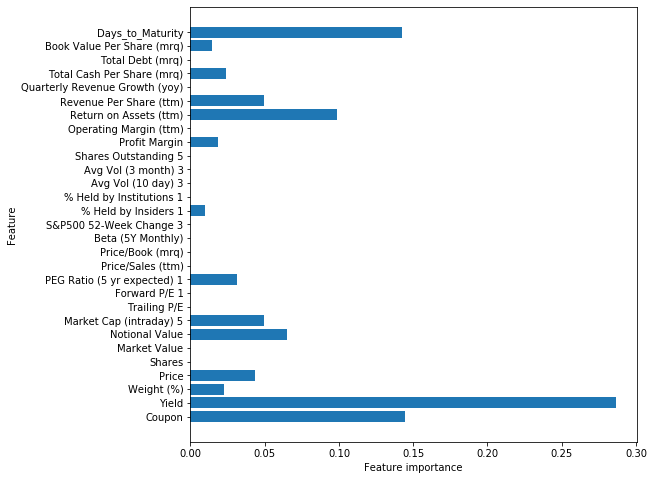

In [47]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [48]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred, labels=np.unique(target_test)))
print(classification_report(target_test, pred, labels=np.unique(target_test)))

[[ 19  10  19   0   0   0   0   0   0   0   0   0   0  26   0   0   0]
 [  3 100  50   0   0   0   0   0   0   0   0   0   0  89   1   2   0]
 [  0  47 103   0   0   0   0   0   0   0   0   0   0 105   3  12   1]
 [  6   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   6   0   2   0   0   0   0   0   0   0   0  12   1   0   0]
 [  0   2  17   0   0   0   0   0   0   0   0   0   0   3   0   0   0]
 [  0   2   9   0   1   0  11   0   0   0   0   0   0   4   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   1]
 [  0   0   0   0   0   0   0   0   7   0   0   0   0   3   0   0   2]
 [  0   0   0   0   0   0   0   0   1   2   0   0   1   1   0   1   2]
 [  0   1   6   0   0   0   0   0   0   0   1   0   0  18   2   9   8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   7   0   1   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0  18   4   0   4   4]
 [  3  24  79   0   0   0   0   0   0   0   1   0   1 216   4  14   1]
 [  0 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
pred

array(['A2', 'Baa1', 'A3', ..., 'Baa1', 'A2', 'Baa1'], dtype=object)

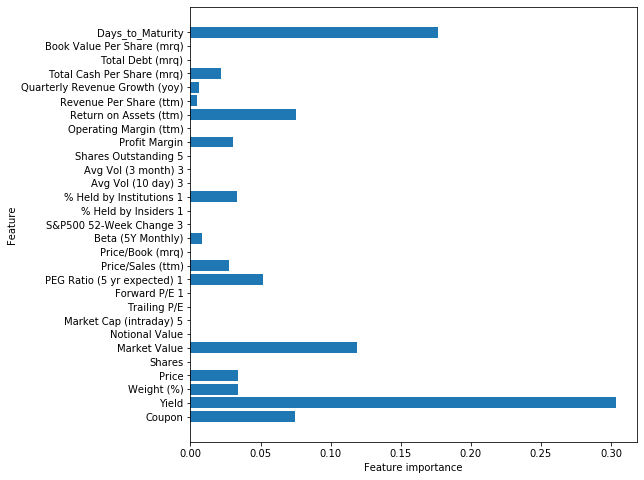

In [50]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5) 
tree_clf.fit(data_train, target_train)

tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [51]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[ 23  21   1   0   0   0   0   0   0   0   0   0   0  28   0   1   0]
 [  1 155   6   0   0   0   0   0   0   0   0   0   0  71   0  12   0]
 [  1 103  41   0   0   0   0   0   0   0   0   0   0 108   4  13   1]
 [  0   0   0  11   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0  12   0   0   0   0   0   0   0   0   7   1   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0  19   0   0   0]
 [  0   3   0   0   5   0  13   0   0   0   0   0   0   6   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0   1]
 [  0   0   0   0   0   0   0   0   7   0   0   0   0   3   0   2   0]
 [  0   0   0   0   0   0   0   0   1   2   0   0   1   1   0   1   2]
 [  0   4   3   0   0   0   0   0   0   0   1   0   2  15   1  19   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   4   0   5   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  18   4   0   7   1]
 [  0  53   5   0   0   0   0   0   0   0   1   0   2 232   9  33   8]
 [  0 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


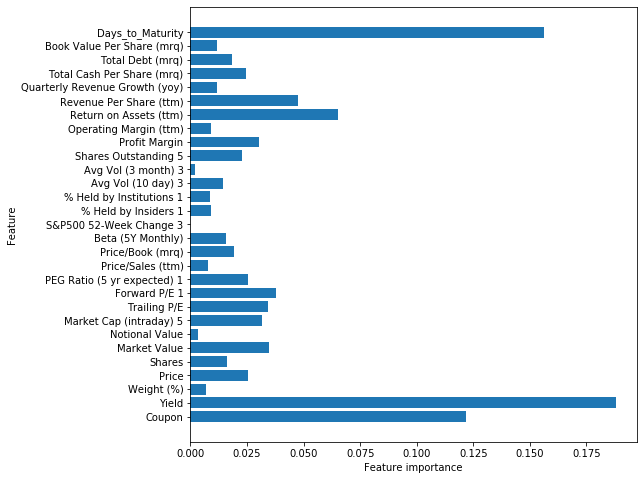

In [52]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10) 
tree_clf.fit(data_train, target_train)

tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [53]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[ 30   8   8   0   1   3   0   0   0   0   0   0   0  19   0   2   3]
 [  3 141  28   0   4   0   0   0   0   0   0   0   0  48   4  13   4]
 [  0  32 150   0   0   1   0   0   0   0   1   0   0  38  17  22  10]
 [  0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   5   3   0   6   0   1   0   0   0   0   0   0   6   1   3   0]
 [  0   2   1   0   0  11   0   0   0   0   0   0   0   6   2   0   0]
 [  0   3   1   0   0   0  15   0   0   0   0   0   0   7   0   0   1]
 [  0   0   0   0   0   0   0   1   0   0   0   0   1   0   0   1   0]
 [  0   0   0   0   0   0   0   0   7   0   0   0   0   0   0   5   0]
 [  0   0   0   0   0   0   0   0   1   2   0   0   0   0   0   1   4]
 [  0   2   4   0   0   0   0   0   0   0  15   0   1   2   4  14   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   8   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0  20   1   2   6   1]
 [  3  25  61   0   0   2   0   0   1   0   2   0   0 164  24  54   7]
 [  0 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


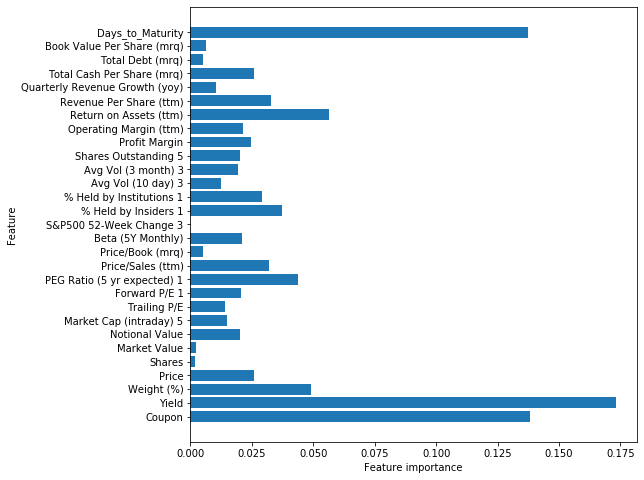

In [54]:
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10) 
tree_clf.fit(data_train, target_train)

tree_clf.feature_importances_

def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [55]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[ 44  11   4   0   0   1   0   0   0   0   0   0   0   5   3   4   2]
 [  6 143  36   0   3   1   0   0   0   0   0   0   0  22  10  18   6]
 [  1  46 168   0   0   1   0   0   0   0   1   0   0  27  14   6   7]
 [  0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0   2   4   0  14   0   0   0   0   0   0   0   0   0   5   0   0]
 [  1   3   1   0   0  11   0   0   0   0   0   0   0   4   2   0   0]
 [  0   1   0   0   0   0  24   0   0   0   0   0   0   2   0   0   0]
 [  0   0   0   0   0   0   0   0   1   1   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   7   0   0   2   0   2   0   1   0]
 [  0   0   0   0   0   0   0   1   1   2   0   0   1   0   0   1   2]
 [  0   0   7   0   0   0   0   0   0   0  17   1   0   8   4   6   2]
 [  0   0   0   0   0   0   0   1   0   0   2   0   0   0   2   4   1]
 [  0   0   0   0   0   1   0   0   0   0   3   1  17   0   1   6   1]
 [  0  35  45   0   0   2   0   0   4   0   0   0   0 194  15  39   9]
 [  1 

In [56]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 53.81%


In [57]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [58]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [59]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.46791178223723423

In [60]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.4368295589988081

In [61]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=10), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [62]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.8027021657063381

In [63]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.6507747318235996

In [64]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [65]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.45797734949334395

In [66]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.4469606674612634

In [67]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=10), 
                                 n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
   

In [68]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.8674746671965031

In [69]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.6579261025029798

In [70]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
# Training accuracy score
forest.score(data_train, target_train)

0.4653288297238228

In [72]:
# Test accuracy score
forest.score(data_test, target_test)

0.4410011918951132

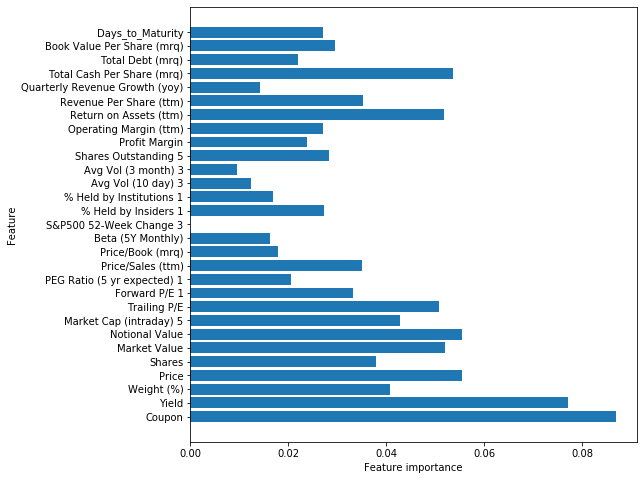

In [73]:
plot_feature_importances(forest)

In [74]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 10, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
forest_2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

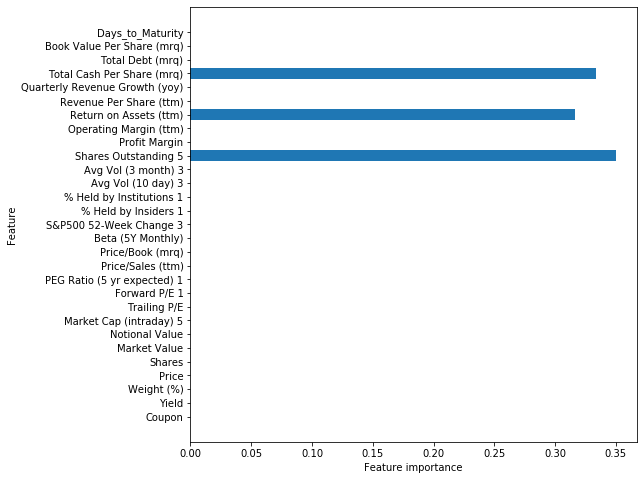

In [77]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [78]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

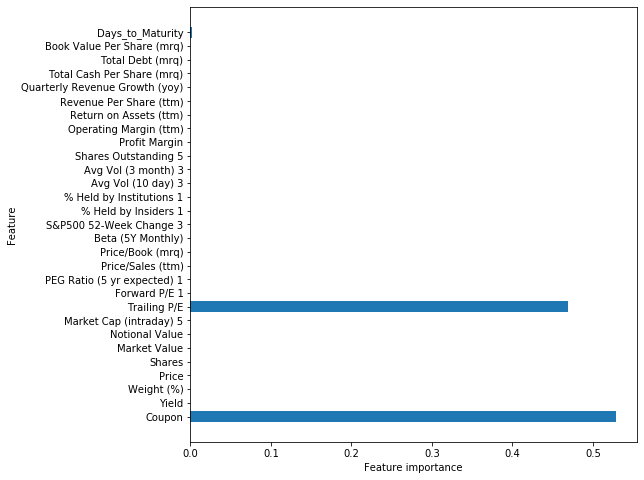

In [79]:
# Feature importance
plot_feature_importances(rf_tree_2)

In [80]:
df

,Coupon,Yield,Moody's Rating,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),S&P500 52-Week Change 3,% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
0,5.125,4.210000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,2586.0
1,5.875,3.540000,Ba3,0.02,47.79,119151.0,5.694226e+06,5.694226e+06,7.24,0.00,15.74,1.58,0.36,1.97,1.60,5.78,4.74,90.09,2.06,1.52,158.62,-1.36,3.51,2.93,127.50,-3.6,4.57,4.39,23.22,1705.0
2,3.250,3.580000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,1858.0
3,4.000,3.440000,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,9740.0
4,6.450,2.498236,A3,0.12,52.81,543134.0,2.868291e+07,2.868291e+07,32.72,10.22,9.76,3.66,1.47,1.14,0.64,5.78,7.81,65.03,5.26,3.22,726.79,14.81,20.95,1.99,30.05,9.3,7.65,8.45,39.85,7488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,4.000,4.160000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,8187.0
6707,2.875,2.060000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,534.0
6708,2.600,2.270000,Baa1,0.09,38.14,575844.0,2.196269e+07,2.196269e+07,28.63,17.18,10.55,1.08,2.65,9.97,1.24,5.78,4.50,94.55,15.73,11.01,813.52,16.54,22.20,7.31,12.72,-1.9,3.55,8.42,3.61,882.0
6709,3.700,2.390000,A3,0.50,189.95,621307.0,1.180173e+08,1.180173e+08,156.79,197.28,44.75,2.59,9.89,4.71,1.22,5.78,3.87,83.17,10.26,5.45,887.00,4.64,4.18,1.08,19.86,33.0,7.36,6.49,37.56,2979.0


In [81]:
d_train, d_test, t_train, t_test = train_test_split(X, y, 
                                                                    test_size = 0.25, random_state=1234)

In [82]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 75, max_features= 15, max_depth= 7)
forest_2.fit(d_test, t_test)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
# forest_2.score(d_train, t_train)

In [83]:
forest_2.score(d_test, t_test)

0.700834326579261

In [84]:
rf_predictions = forest_2.predict(d_test)

In [85]:
pd.DataFrame(rf_predictions)

,0
0,A2
1,Baa1
2,Baa1
3,Baa3
4,Baa1
...,...
1673,A2
1674,A3
1675,A2
1676,Baa1


In [86]:
d_test

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),S&P500 52-Week Change 3,% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
6556,3.550,2.480000,0.59,48.22,2851554.0,1.375019e+08,1.375019e+08,173.26,10.43,9.25,0.94,2.10,1.05,1.11,5.78,78.23,0.00,36.03,21.37,4.10,23.71,30.44,1.05,18.77,-5.8,88.97,347.08,40.33,2054.0
4778,3.700,2.498236,0.12,44.07,615458.0,2.712323e+07,2.712323e+07,37.82,12.28,21.09,1.16,3.88,1.77,0.14,5.78,0.33,85.57,13.19,7.58,819.84,28.80,18.02,3.62,13.25,44.9,3.07,6.91,26.51,1125.0
1429,4.300,3.480000,0.04,29.20,287359.0,8.390883e+06,8.390883e+06,8.04,4.98,3.22,0.38,0.18,0.00,1.70,5.78,40.01,5.17,23.98,10.22,428.20,3.68,8.50,4.03,103.23,3.4,8.98,33.44,-0.28,8326.0
2464,4.500,3.730000,0.74,59.95,2868861.0,1.719882e+08,1.719882e+08,239.91,27.01,22.82,2.78,6.44,12.61,0.39,5.78,0.74,70.78,20.28,12.51,4.28,23.94,28.51,7.83,8.72,16.2,2.61,44.18,4.43,565.0
5077,4.000,2.498236,0.16,83.77,437747.0,3.667007e+07,3.667007e+07,46.12,11.74,13.86,4.58,1.18,3.37,0.60,5.78,0.29,82.13,4.06,3.28,584.63,10.18,13.72,6.59,66.80,33.7,3.08,4.41,23.39,3303.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,1.700,1.930000,0.08,139.32,136548.0,1.902387e+07,1.902387e+07,23.68,38.15,30.93,3.91,6.56,3.86,0.11,5.78,0.24,89.88,1.65,1.03,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.85,573.0
6205,2.875,2.530000,0.40,153.46,606931.0,9.313963e+07,9.313963e+07,116.01,20.92,14.32,1.90,1.51,2.75,1.24,5.78,0.11,83.56,8.21,3.84,865.31,7.19,13.33,4.69,90.13,8.4,8.61,46.34,48.78,3470.0
2027,3.400,2.540000,0.50,66.38,1749918.0,1.161596e+08,1.161596e+08,136.22,30.02,8.17,0.52,5.21,2.63,0.76,5.78,0.10,79.35,16.35,14.62,2.34,13.15,27.02,5.35,15.33,33.0,6.82,47.54,22.92,3450.0
1376,4.200,3.440000,0.16,103.76,369888.0,3.837958e+07,3.837958e+07,46.99,24.51,20.32,3.29,3.02,2.39,0.15,5.78,0.02,77.65,4.31,2.51,494.17,12.35,18.43,2.48,31.52,-4.9,0.91,30.84,39.73,10427.0


In [87]:
rft_predictions = forest_2.predict(d_train)
pd.DataFrame(rft_predictions)

,0
0,A3
1,Baa1
2,Baa1
3,Baa1
4,WR
...,...
5028,Baa1
5029,Baa3
5030,Baa1
5031,Baa1


In [88]:
d_train

,Coupon,Yield,Weight (%),Price,Shares,Market Value,Notional Value,Market Cap (intraday) 5,Trailing P/E,Forward P/E 1,PEG Ratio (5 yr expected) 1,Price/Sales (ttm),Price/Book (mrq),Beta (5Y Monthly),S&P500 52-Week Change 3,% Held by Insiders 1,% Held by Institutions 1,Avg Vol (10 day) 3,Avg Vol (3 month) 3,Shares Outstanding 5,Profit Margin,Operating Margin (ttm),Return on Assets (ttm),Revenue Per Share (ttm),Quarterly Revenue Growth (yoy),Total Cash Per Share (mrq),Total Debt (mrq),Book Value Per Share (mrq),Days_to_Maturity
2078,3.000,2.000000,0.05,245.68,47913.0,1.177127e+07,1.177127e+07,14.47,33.33,26.35,2.38,2.05,36.68,0.24,5.78,0.53,105.30,839.25,661.04,66.25,6.27,8.35,8.46,106.83,8.6,2.14,3.56,5.950000,1125.0
1885,2.400,3.730000,0.14,93.14,362525.0,3.376558e+07,3.376558e+07,44.51,29.18,23.37,2.47,4.02,5.69,0.93,5.78,0.11,86.66,2.89,2.48,510.56,14.28,16.59,6.73,21.27,-0.1,5.73,5.79,15.310000,913.0
1927,8.625,2.498236,0.58,340.49,396092.0,1.348654e+08,1.348654e+08,162.90,0.00,17.57,4.98,2.13,0.00,1.31,5.78,0.10,68.60,8.53,7.01,562.79,-0.83,-2.75,-1.05,135.26,-36.8,17.81,28.53,-15.310000,4292.0
2813,4.800,3.650000,0.24,101.28,544983.0,5.519588e+07,5.519588e+07,70.89,19.11,17.77,4.42,2.87,1.58,0.16,5.78,0.10,65.51,4.79,3.57,733.32,15.20,23.14,2.34,33.82,6.9,0.42,62.90,61.200000,9436.0
1668,4.080,4.560000,0.05,21.98,486121.0,1.068494e+07,1.068494e+07,17.70,0.00,10.66,0.41,0.74,0.00,1.02,5.78,0.20,95.86,12.42,5.85,649.87,0.54,6.80,1.91,42.95,1.3,4.97,7.46,33.569729,10166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,7.500,2.498236,0.36,256.25,328668.0,8.422118e+07,8.422118e+07,106.63,56.78,47.77,2.30,14.07,21.09,0.42,5.78,0.29,94.75,2.92,1.70,442.94,24.90,37.79,4.72,17.14,-9.8,3.39,31.06,11.410000,1978.0
3276,5.875,4.120000,0.36,12.83,6475032.0,8.307466e+07,8.307466e+07,97.98,0.00,14.75,2.35,1.03,3.46,1.12,5.78,0.14,63.74,88.95,60.74,8.73,-5.23,6.76,1.39,10.91,-1.0,1.66,94.04,3.240000,6544.0
1318,4.400,2.750000,0.08,139.32,136548.0,1.902387e+07,1.902387e+07,23.68,38.15,30.93,3.91,6.56,3.86,0.11,5.78,0.24,89.88,1.65,1.03,180.78,17.20,33.79,3.47,19.94,6.1,0.38,9.56,33.850000,2193.0
723,2.150,2.498236,0.02,47.96,101873.0,4.885829e+06,4.885829e+06,6.05,73.37,60.30,3.98,6.41,1.83,0.43,5.78,0.78,98.82,961.15,683.10,137.40,9.01,20.91,1.69,6.87,4.1,0.40,3.87,24.000000,28.0


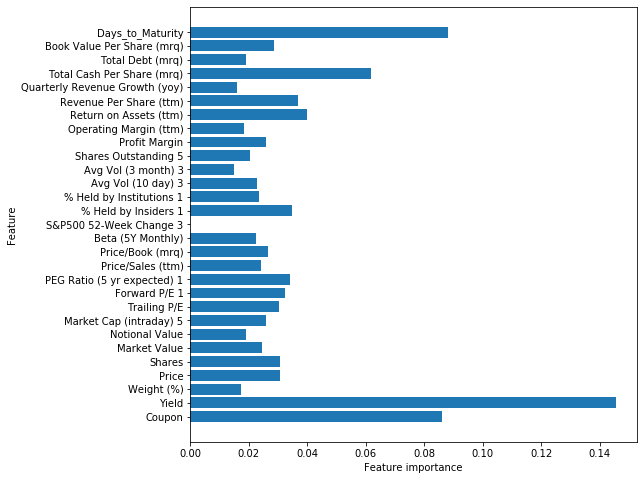

In [89]:
plot_feature_importances(forest_2)

In [90]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

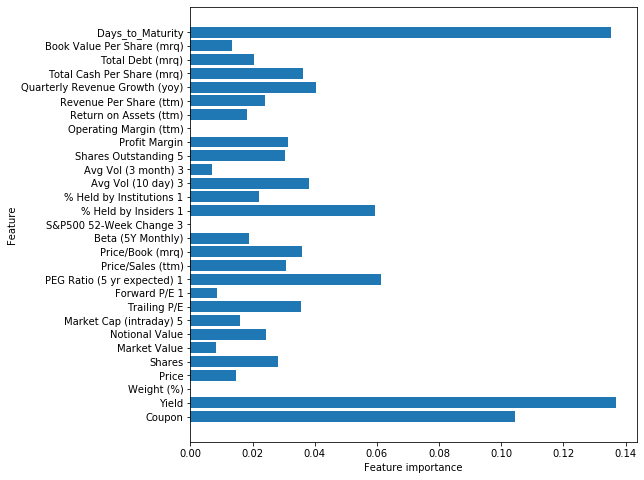

In [91]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [92]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

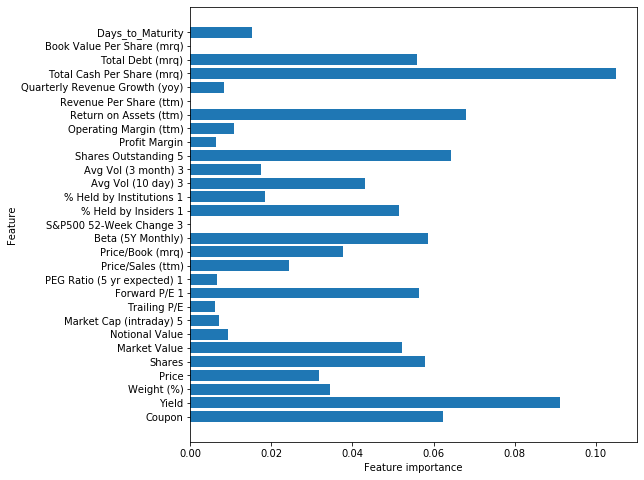

In [93]:
# Feature importance
plot_feature_importances(rf_tree_2)

In [84]:
# forest_2.pred

In [85]:
# predict.forest_2

In [94]:
mlist = list(mdf["Moody's Rating"].unique())

In [95]:
mlist

['Ba3',
 'A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'B2',
 'Baa3',
 'Ba1',
 'B1',
 'Aa2',
 'A1',
 'Aa3',
 'Aa1',
 'Ba2',
 'B3',
 'Aaa']

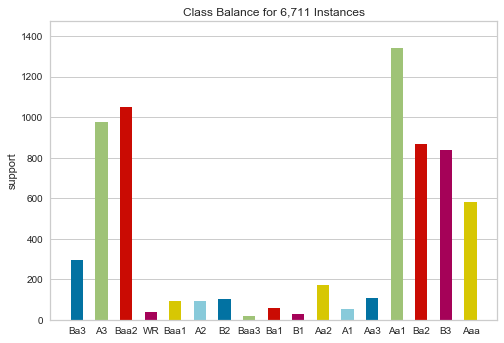

In [96]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
data_train, target_train = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ba3',
 'A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'B2',
 'Baa3',
 'Ba1',
 'B1',
 'Aa2',
 'A1',
 'Aa3',
 'Aa1',
 'Ba2',
 'B3',
 'Aaa'])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

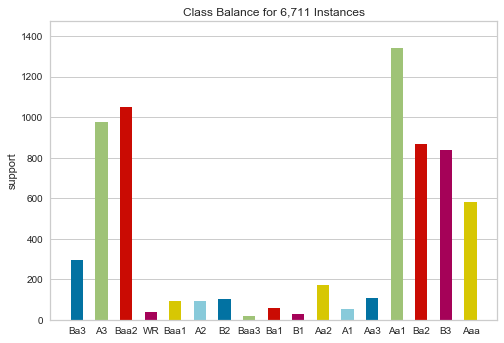

In [97]:
from yellowbrick.datasets import load_game
from yellowbrick.target import ClassBalance

# Load the classification dataset
data_test, target_test = load_game()

# Instantiate the visualizer
visualizer = ClassBalance(labels=['Ba3',
 'A3',
 'Baa2',
 'WR',
 'Baa1',
 'A2',
 'B2',
 'Baa3',
 'Ba1',
 'B1',
 'Aa2',
 'A1',
 'Aa3',
 'Aa1',
 'Ba2',
 'B3',
 'Aaa'])

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure